In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

C:\Users\15783\AppData\Local\Temp\ipykernel_19104\606206881.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


[College dataset](https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset) is to predict whether a highschooler will go to college given their circumstance

One thing to note is that this is a synthetic dataset

In [2]:
raw_df=pandas.read_csv("studentInfo.csv",index_col=[2])

display(raw_df)

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
id_student,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
28400,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
30268,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
31604,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
2640965,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
2645731,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
2648187,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


In [3]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 32593 entries
Number of duplicate entries: 3563
The dataset contains 29030 unique entries
This datasets has 10 features


In [4]:
label_column="final_result"

In [6]:
df[label_column]=df[label_column].replace(['Distinction','Withdrawn'],['Pass','Fail'])
#unifiying <30 and >30 label to simplify the dataset task (as well as make different datasets comparable)

C:\Users\15783\AppData\Local\Temp\ipykernel_19104\2088514649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_column]=df[label_column].replace(['Distinction','Withdrawn'],['Pass','Fail'])


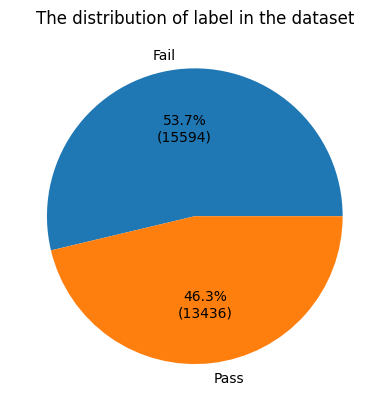

In [7]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label distribution of the dataset is relatively balanced

In [8]:
sex_column="gender"
privilleged_group="M"

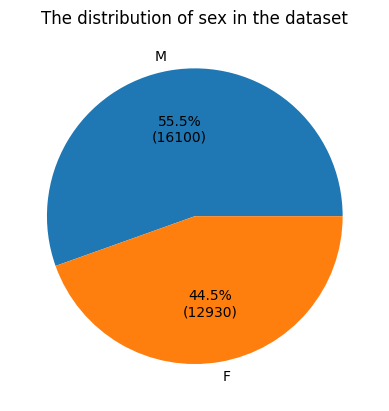

In [9]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attributes of the dataset is relatively balanced

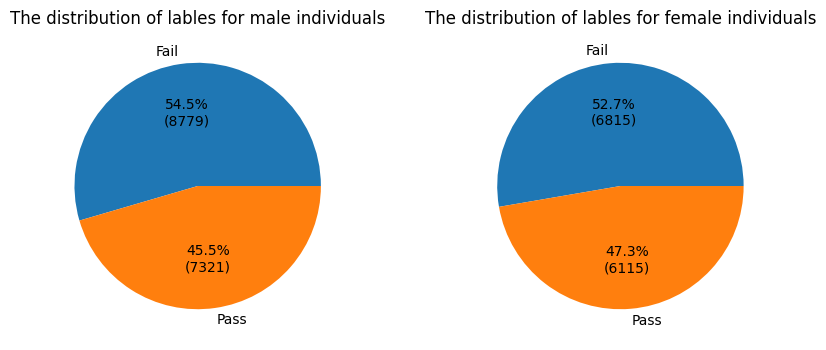

In [10]:
man_df=df.loc[df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

The label distributions of both groups are similar to overall distribution